## scikit-learn中的多项式回归

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [5]:
X2.shape

(100, 3)

In [6]:
X[:5,:]

array([[ 0.96041531],
       [-0.46050171],
       [ 1.23114846],
       [-1.70968353],
       [ 1.79213098]])

In [7]:
X2[:5,:]

array([[ 1.        ,  0.96041531,  0.92239757],
       [ 1.        , -0.46050171,  0.21206182],
       [ 1.        ,  1.23114846,  1.51572653],
       [ 1.        , -1.70968353,  2.92301778],
       [ 1.        ,  1.79213098,  3.21173345]])

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

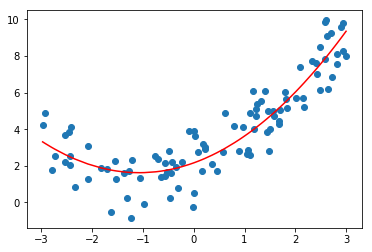

In [9]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [10]:
lin_reg2.coef_

array([ 0.        ,  1.00053707,  0.46577646])

In [11]:
lin_reg2.intercept_

2.1584112869976466

### 关于PolynomialFeatures

In [12]:
X = np.arange(1, 11).reshape(-1, 2)

In [13]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [14]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [15]:
X2.shape

(5, 6)

In [16]:
X2

array([[   1.,    1.,    2.,    1.,    2.,    4.],
       [   1.,    3.,    4.,    9.,   12.,   16.],
       [   1.,    5.,    6.,   25.,   30.,   36.],
       [   1.,    7.,    8.,   49.,   56.,   64.],
       [   1.,    9.,   10.,   81.,   90.,  100.]])

### Pipeline

In [19]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

from sklearn.preprocessing import StandardScaler

poly = PolynomialFeatures(degree=2)
stdScaler = StandardScaler()
lin_reg = LinearRegression()

from sklearn.pipeline import Pipeline

poly_reg = Pipeline([
    ("poly", poly),
    ("stdScaler", stdScaler),
    ("lin_reg", lin_reg)
])

In [21]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

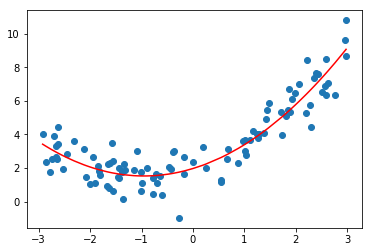

In [22]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()